# Breast Cancer 

위스콘신 유방암 진단에 관련한 머신러닝 프로젝트이다.

아마 binary(0,1)로 나누어 유방암에 걸렸나, 걸리지 않았나를 진단하는 프로젝트일 것으로 예상되고, 이 때 9개의 피쳐를 사용하여 머신러닝 모델링을 진행하는 것으로 생각된다.

201개의 데이터에 하나의 결과 값이, 나머지 85개의 데이터의 또 다른 하나의 결과 값이 존재하는 것으로 확인된다. 

피쳐의 종류는 nominal(명목형), linear(연속형) 두 가지가 있는 듯 하다.

### features
피쳐에는 총 9개가 있는데

1. class : 타겟 값인 것 같다. 

no recurrence-events, recurrence-events가 있는데 유방암의 재발 여부를 나타내는 데이터이다. no recc는 재발하지 않는 데이터, recurr는 재발하는 유방암이다.

2. age : 환자의 나이이다.

총 9개의 area로 나누어져있으며 이가 연속적으로 구성이 되어 있을지, 아니면 nominal로 구성되어있는지는 확인이 필요하다.

3. menopause : 폐경이라는 뜻이다. 진단시 환자가 폐경인지 아닌지에 대한 여부이다.

it40는 less than 40라는 뜻 그러므로 폐경 x, ge40는 great or equal than 40이므로 페경 o.  premenopause는 40 이전이지만 폐경 o인 사람들을 의미한다.

4. tumor-size : 종양의 크기를 의미한다.

총 12개의 area로 나누어져 있으며, 종양의 크기가 유방암 재발에 영향을 주는지에 대해서 확인해보면 될 듯 하다.

5. inv-nodes : 림프 노드 개수이다.

총 13개의 area로 구성 되어 있으며 림프절의 개수라고 봐도 무방하다. 암과도 매우 연관성이 큰 feature로 서치하였다. 확인해보자

6. node-caps : 림프절에 전이성 암이 포함되어 있는지에 대한 여부이다.

yes는 전이됨, no는 전이 되지 않음이다.

7. deg.malign : 암의 심각성을 나타내는 지표이다. 

1~3으로 구성되어 있으며, 3기일 때 가장 심각하다고 생각한다.

8. breast : 암이 유방의 어느 쪽에 위치하는가에 대한 피쳐이다

left, right 총 두가지가 존재한다.

9. breast.quad : 하나의 유방에서 암이 발병한 지역을 의미한다.

중앙, 오른쪽 위, 오르쪽 아래, 왼쪽 위, 왼쪽 아래로 5개의 section으로 구성되어있다.

10. irradiat : 환자가 방사선 치료를 받았는지에 대한 여부이다.

yes는 치료 받음, no는 치료 받지 않음이다.

### 1. dataset 확인하기

실제로 데이터 셋을 확인해보며 어떤 분포를 지니는지, 결측값은 어떻게 존재하는지를 확인해보겠다.

In [183]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv('C:/Users/jlee0/kaggle/breast cancer/data.csv', encoding='cp949')

In [185]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,03월 05일,no,3,left,left_low,no


일단 기본적으로 metadata를 만들어주겠다.

metadata는

1. conti / nomi / bin / ordi

2. input / target / id

3. int / float / char

이렇게 3가지로 나누어 구성할 것이다.

#### 1. class

target 값으로 유방암이 재발하였는지, 재발되지 않았는지에 대한 피쳐이다.

no-recurrence-events는 0으로 recurrence-events는 1로 바꾸어주고 shape은 bin으로, type은 target, dtype은 int로 바꾸어주겠다. 

In [186]:
df.replace('no-recurrence-events',0, inplace = True)
df.replace('recurrence-events',1, inplace = True)

In [187]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,1,40-49,ge40,30-34,03월 05일,no,3,left,left_low,no


In [188]:
metadata = pd.DataFrame({'feature' : ['Class'], 'shape' : ['bin'], 'type' : ['target'], 'dtype' : ['int']})

In [189]:
metadata

,feature,shape,type,dtype
0,Class,bin,target,int


In [190]:
df['Class'].value_counts()

0    201
1     85
Name: Class, dtype: int64

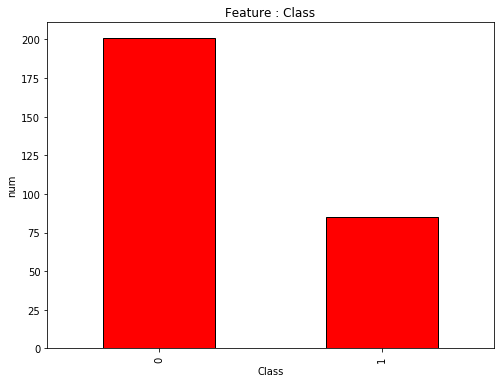

In [191]:
plt.figure(figsize = (8,6))

df['Class'].value_counts().plot.bar(color = 'red', edgecolor = 'k')
plt.title('Feature : Class')
plt.xlabel('Class')
plt.ylabel('num')

plt.show();

재발하지 않은 환자가 더 많다는 사실을 bar 그래프를 통해서 확인할 수 있었다..

어느정도 정보의 불균형은 존재하는 듯 하다.

#### 2. age

사람들의 나이에 대한 feature이다.

In [192]:
df['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

데이터의 설명에는 10~19부터 90 ~ 99로 총 9개의 section으로 분류되어있다고 적혀있었지만, 실제로는 6개의 영역만이 존재했다.

age의 경우 ordinal 피쳐이기 때문에 20 - 29는 2로 30 - 39는 3으로 40 - 49는 4로 50 - 59는 5로 60 - 69는 6으로 70 - 79는 7로 나타내주겠다. 또한 shape은 ordianl, type은 input, dtype은 int로 metadata상에 기록하겠다.

In [193]:
df.replace(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], [3,4,6,5,7,2], inplace = True)

In [194]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,0,3,premeno,30-34,0-2,no,3,left,left_low,no
1,0,4,premeno,20-24,0-2,no,2,right,right_up,no
2,0,4,premeno,20-24,0-2,no,2,left,left_low,no
3,0,6,ge40,15-19,0-2,no,2,right,left_up,no
4,0,4,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,3,premeno,30-34,0-2,no,2,left,left_up,no
282,1,3,premeno,20-24,0-2,no,3,left,left_up,yes
283,1,6,ge40,20-24,0-2,no,1,right,left_up,no
284,1,4,ge40,30-34,03월 05일,no,3,left,left_low,no


In [195]:
metadata = metadata.append({'feature' : 'age', 'shape' : 'ordi', 'type' : 'input', 'dtype' : 'int'},ignore_index=True)

In [196]:
metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int


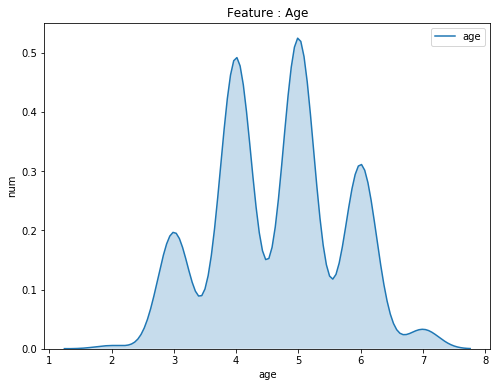

In [197]:
plt.figure(figsize= (8,6))

sns.kdeplot(df['age'],shade = True)
plt.title('Feature : Age')
plt.xlabel('age')
plt.ylabel('num')

plt.show();

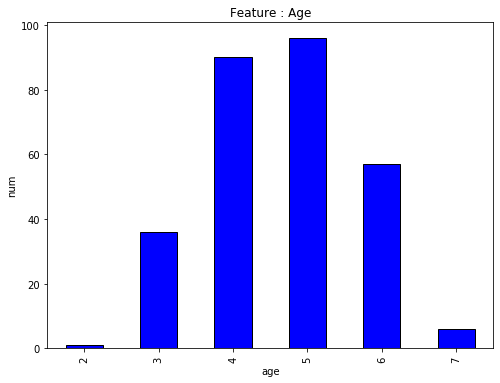

In [198]:
plt.figure(figsize = (8,6))

df['age'].value_counts().sort_index().plot.bar(color = 'Blue', edgecolor = 'k')

plt.title('Feature : Age')
plt.xlabel('age')
plt.ylabel('num')

plt.show();

아무래도 40 - 50대의 사람들이 가장 많은 것으로 확인되었다. 

나이와 재발 여부의 상관관계는 매우 유의미할 것으로 예상된다. 

이후에 class와 함께 확인해봐도 좋을 듯!

#### 3. menopause

페경 여부에 대한 피쳐이다.

it40는 less than 40라는 뜻 그러므로 폐경 x, ge40는 great or equal than 40이므로 페경 o. premenopause는 40 이전이지만 폐경 o인 사람들을 의미한다.

In [199]:
df['menopause'].unique()

array(['premeno', 'ge40', 'lt40'], dtype=object)

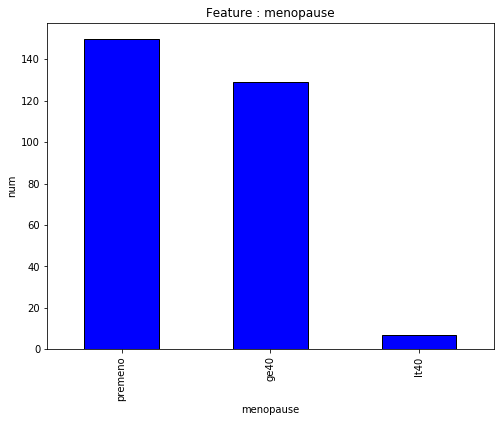

In [200]:
plt.figure(figsize = (8,6));

df['menopause'].value_counts().plot.bar(edgecolor = 'k', color = 'Blue')

plt.title('Feature : menopause');
plt.xlabel('menopause');
plt.ylabel('num');

plt.show();

40세 이전의 폐경 전의 사람들이 정말 적고, 40세 이후의 페경을 거친 사람과 조기 페경이 이루어진 사람은 많다는 것을 확인할 수 있다.

it40은 0, ge40은 1, premeno는 2로 바꿔주겠다.

In [201]:
df.replace(['lt40','ge40','premeno'],[0,1,2],inplace = True)

In [202]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,0,3,2,30-34,0-2,no,3,left,left_low,no
1,0,4,2,20-24,0-2,no,2,right,right_up,no
2,0,4,2,20-24,0-2,no,2,left,left_low,no
3,0,6,1,15-19,0-2,no,2,right,left_up,no
4,0,4,2,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,3,2,30-34,0-2,no,2,left,left_up,no
282,1,3,2,20-24,0-2,no,3,left,left_up,yes
283,1,6,1,20-24,0-2,no,1,right,left_up,no
284,1,4,1,30-34,03월 05일,no,3,left,left_low,no


metadata에서는 shape은 nomi, type은 input, dtype은 int로 정리해주겠다.

In [203]:
metadata = metadata.append({'feature' : 'menopause','shape' : 'nomi','type':'input','dtype':'int'},ignore_index = True)

In [204]:
metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int
2,menopause,nomi,input,int


class의 분포를 확인해봤을 때, 재발하지 않은 사람들이 더 많았다. 이를 menopause의 분포 결과와 함께 확인해보았을 때, 조기 페경 자체가 재발에 큰 영향을 끼치지는 않을 것으로 보인다.

하지만 확인해보자!

#### 4. tumor_size

종양의 크기에 대한 피쳐이고, 총 12개의 section으로 나누어져있다.

In [205]:
df['tumor-size'].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10월 14일',
       '40-44', '35-39', '05월 09일', '45-49'], dtype=object)

총 11개의 section이 있는 것으로 확인되었고, 10월 14일, 5월 9일과 같은 결측값도 존재한다는 것을 확인할 수 있다.

2개의 결측값들만 한번 확인해보자

In [206]:
df[df['tumor-size']=='10월 14일'].head(5)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
12,0,6,0,10월 14일,0-2,no,1,left,right_up,no
32,0,5,2,10월 14일,0-2,no,3,left,left_low,no
33,0,5,1,10월 14일,0-2,no,1,right,left_up,no
34,0,5,1,10월 14일,0-2,no,1,left,left_up,no
38,0,4,2,10월 14일,0-2,no,2,left,left_low,no


In [207]:
df[df['tumor-size']=='0-4'].head(5)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
4,0,4,2,0-4,0-2,no,2,right,right_low,no
10,0,4,2,0-4,0-2,no,3,left,central,no
36,0,5,1,0-4,0-2,no,2,left,central,no
56,0,5,1,0-4,0-2,no,1,right,central,no
62,0,5,1,0-4,0-2,no,1,left,left_low,no


tumor-size가 10월 14일이라는 것은 내 생각엔 10-14를 의미하고 5월 9일이라고 하는 것은 5-9를 의미한다고 생각한다. (4단위로 끊어져있는 size들을 보았을 때!) 

이로 대체해주자

그리고 size는 서수형 변수라고 생각할 수 있기 때문에 0-4 : 0, 5-9 : 1 ... 이렇게 순서를 나타내는 형태로 바꿔주겠다.

In [208]:
df.replace(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10월 14일','40-44', '35-39', '05월 09일', '45-49'],[7,5,4,1,6,11,3,9,8,2,10],inplace = True)

In [209]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,0,3,2,7,0-2,no,3,left,left_low,no
1,0,4,2,5,0-2,no,2,right,right_up,no
2,0,4,2,5,0-2,no,2,left,left_low,no
3,0,6,1,4,0-2,no,2,right,left_up,no
4,0,4,2,1,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,3,2,7,0-2,no,2,left,left_up,no
282,1,3,2,5,0-2,no,3,left,left_up,yes
283,1,6,1,5,0-2,no,1,right,left_up,no
284,1,4,1,7,03월 05일,no,3,left,left_low,no


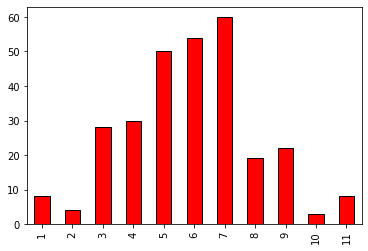

In [210]:
df['tumor-size'].value_counts().sort_index().plot.bar(edgecolor = 'k',color = 'Red')

metadata의 경우 shape은 orid, type은 input, dtype은 int로 나타내주겠다.

In [211]:
metadata = metadata.append({'feature':'tumor-size','shape':'ordi','type':'input','dtype':'int'},ignore_index = True)

In [212]:
metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int
2,menopause,nomi,input,int
3,tumor-size,ordi,input,int


#### 5. inv-nodes

림프절의 개수에 대한 피쳐이다. 총 13개의 section으로 구성되어있으며 인터넷으로 간단하게 서치했을 때 암과의 연관성이 높은 피쳐라고 조사되었다. 확인해보자

In [213]:
df['inv-nodes'].unique()

array(['0-2', '06월 08일', '09월 11일', '03월 05일', '15-17', '12월 14일',
       '24-26'], dtype=object)

총 7개의 section만이 존재하는것으로 확인되었고, 4개의 결측 피쳐가 있는 것으로 확인되었다.

앞의 tumor-size와 마찬가지로 대체해주겠다.

In [214]:
df.replace(['0-2', '06월 08일', '09월 11일', '03월 05일', '15-17', '12월 14일','24-26'],[1,3,4,2,6,5,9],inplace = True)

In [215]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,0,3,2,7,1,no,3,left,left_low,no
1,0,4,2,5,1,no,2,right,right_up,no
2,0,4,2,5,1,no,2,left,left_low,no
3,0,6,1,4,1,no,2,right,left_up,no
4,0,4,2,1,1,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,3,2,7,1,no,2,left,left_up,no
282,1,3,2,5,1,no,3,left,left_up,yes
283,1,6,1,5,1,no,1,right,left_up,no
284,1,4,1,7,2,no,3,left,left_low,no


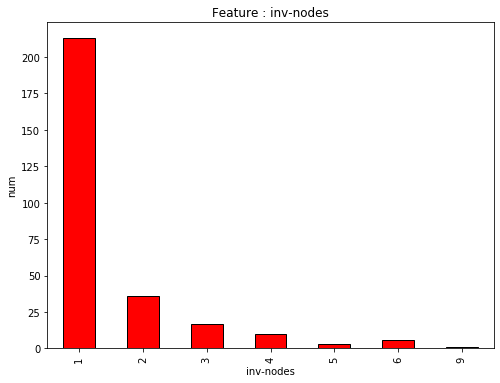

In [216]:
plt.figure(figsize = (8,6))

df['inv-nodes'].value_counts().sort_index().plot.bar(edgecolor = 'k',color = 'RED')

plt.title('Feature : inv-nodes')
plt.xlabel('inv-nodes')
plt.ylabel('num')

plt.show();

림프절의 개수가 0~2개 있는 사람이 압도적으로 높았다. 

이게 어떤 것을 의미하는지는 확인해봐야할 듯 하다.

metadata의 경우 shape은 ordi, type은 input, dtype은 int로 넣어주겠다.

In [217]:
metadata = metadata.append({'feature':'inv-nodes','shape':'ordi','type':'input','dtype':'int'},ignore_index = True)

In [218]:
metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int
2,menopause,nomi,input,int
3,tumor-size,ordi,input,int
4,inv-nodes,ordi,input,int


#### 6. node-caps 

림프절에 전이성암이 포함되어 있는지에 대한 피쳐이다.

yes는 포함되어 있다, no는 포함되어 있지 않다.

직관적으로 생각했을 때에는 림프절에 전이성암이 포함되어 있다면 재발 가능성이 높아질 것이라고 생각하지만 이는 확인해봐야하는 부분이다.

In [219]:
df['node-caps'].unique()

array(['no', 'yes', '?'], dtype=object)

In [220]:
df[df['node-caps'] == '?']

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
145,0,4,2,6,1,?,2,left,right_low,yes
163,0,6,1,6,2,?,1,right,left_up,yes
164,0,6,1,6,2,?,1,right,left_low,yes
183,0,5,1,7,4,?,3,left,left_up,yes
184,0,5,1,7,4,?,3,left,left_low,yes
233,1,7,1,4,4,?,1,left,left_low,yes
263,1,5,0,5,1,?,1,left,left_up,no
264,1,5,0,5,1,?,1,left,left_low,no


node-caps에는 ?값으로 채워진 결측값들이 존재한다. 이는 나머지 데이터들을 통해서 모델링을 통해 결측값을 채워주는게 가능하지 않을까?라고 생각한다.

no는 0으로 yes는 1로 대체해주겠다.

In [221]:
df['node-caps'].replace(['yes','no'],[1,0],inplace = True)

In [222]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,0,3,2,7,1,0,3,left,left_low,no
1,0,4,2,5,1,0,2,right,right_up,no
2,0,4,2,5,1,0,2,left,left_low,no
3,0,6,1,4,1,0,2,right,left_up,no
4,0,4,2,1,1,0,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,3,2,7,1,0,2,left,left_up,no
282,1,3,2,5,1,0,3,left,left_up,yes
283,1,6,1,5,1,0,1,right,left_up,no
284,1,4,1,7,2,0,3,left,left_low,no


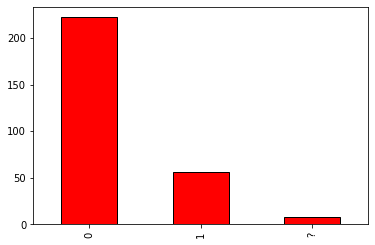

In [223]:
df['node-caps'].value_counts().plot.bar(edgecolor = 'k',color = 'red')

다행히도 결측 비율이 높지 않은 것으로 확인된다. 

간단한 randomforest 모델을 통해서 결측값을 채우자

metadata의 경우 shape은 bin, type은 input, dtype은 int로 추가하겠다.

In [224]:
metadata = metadata.append({'feature':'node-caps','shape':'bin','type':'input','dtype':'int'},ignore_index = True)

In [225]:
metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int
2,menopause,nomi,input,int
3,tumor-size,ordi,input,int
4,inv-nodes,ordi,input,int
5,node-caps,bin,input,int


#### 7. deg-malig

암의 심각성을 나타내는 지표로 1~3기로 구성되어있다.

당연한 이야기지만 3기가 가장 심각한 상태임을 의미한다. 

재발과 매우 연관성이 높은 지표일 듯 하다. 한번 확인해보자

In [226]:
df['deg-malig'].unique()

array([3, 2, 1], dtype=int64)

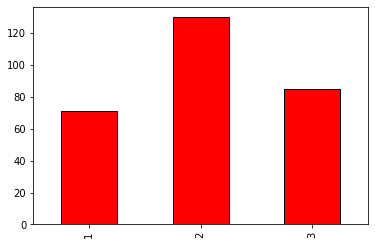

In [227]:
df['deg-malig'].value_counts().sort_index().plot.bar(color = 'red', edgecolor = 'k')

어느정도의 차이는 있지만, 1,2,3기 모두 어느정도의 비율을 유지하면서 분포하고 있는 것을 확인할 수 있다. 

metadata의 경우 shape은 ordi, type은 input, dtype은 int로 추가하겠다.

In [228]:
metadata = metadata.append({'feature':'deg-malig','shape':'ordi','type':'input','dtype':'int'},ignore_index = True)

In [229]:
metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int
2,menopause,nomi,input,int
3,tumor-size,ordi,input,int
4,inv-nodes,ordi,input,int
5,node-caps,bin,input,int
6,deg-malig,ordi,input,int


#### 8. breast

암이 유방의 어느 쪽에 위치하는가에 대한 자료이다.

right, left 총 두 종류로 구분어있다.

In [230]:
df['breast'].unique()

array(['left', 'right'], dtype=object)

left의 경우 0, right의 경우 1로 바꿔주겠다.

metadata는 shape은 bin, type은 input, dtype은 int이다.

In [231]:
df['breast'].replace(['left','right'],[0,1],inplace = True)

In [232]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,0,3,2,7,1,0,3,0,left_low,no
1,0,4,2,5,1,0,2,1,right_up,no
2,0,4,2,5,1,0,2,0,left_low,no
3,0,6,1,4,1,0,2,1,left_up,no
4,0,4,2,1,1,0,2,1,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,3,2,7,1,0,2,0,left_up,no
282,1,3,2,5,1,0,3,0,left_up,yes
283,1,6,1,5,1,0,1,1,left_up,no
284,1,4,1,7,2,0,3,0,left_low,no


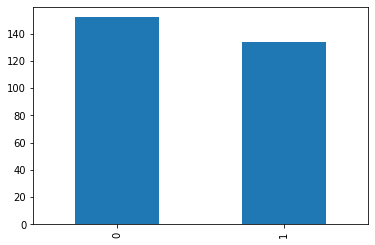

In [233]:
df['breast'].value_counts().sort_index().plot.bar()

왼쪽과 오른쪽 유방암의 분포는 거의 비슷하게 나왔다.

내 생각에는 그다지 유의미한 피쳐는 아닐 것 같다.

하지만 이 또한 확인해야하는 부분!

In [234]:
metadata = metadata.append({'feature':'breast','shape':'bin','type':'input','dtype':'int'},ignore_index = True)

In [235]:
metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int
2,menopause,nomi,input,int
3,tumor-size,ordi,input,int
4,inv-nodes,ordi,input,int
5,node-caps,bin,input,int
6,deg-malig,ordi,input,int
7,breast,bin,input,int


#### 9. breast-quad

유두를 기준으로 유방암이 어느곳에 위치하냐에 대한 피쳐이다. 

left-up, left-low, right-up, right-low, center 총 5개의 값으로 이루어져 있다.

In [236]:
df['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

?라는 결측값이 존재하는 것을 확인하였다. 

이를 어떻게 채울지도 고민해봐야한다.

일단 left_low : 0, left_up : 1, right_low : 2, right_up : 3, central : 4로 대체해주겠다.

In [237]:
df['breast-quad'].replace(['left_low','left_up','right_low','right_up','central'],[0,1,2,3,4],inplace = True)

In [238]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,0,3,2,7,1,0,3,0,0,no
1,0,4,2,5,1,0,2,1,3,no
2,0,4,2,5,1,0,2,0,0,no
3,0,6,1,4,1,0,2,1,1,no
4,0,4,2,1,1,0,2,1,2,no
...,...,...,...,...,...,...,...,...,...,...
281,1,3,2,7,1,0,2,0,1,no
282,1,3,2,5,1,0,3,0,1,yes
283,1,6,1,5,1,0,1,1,1,no
284,1,4,1,7,2,0,3,0,0,no


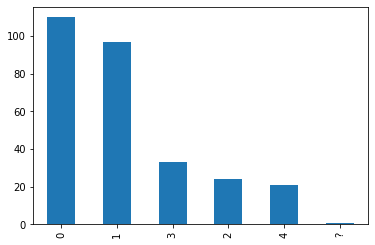

In [239]:
df['breast-quad'].value_counts().plot.bar()

In [240]:
df[df['breast-quad']=='?']

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
206,1,5,1,7,1,0,3,0,?,no


다행히도 결측값이 한개 밖에 없는 것으로 드러났다. 이는 최빈값인 0으로 채워도 무방하다고 생각한다. (결측치 파트에서 다시 다루겠다)

개인적으로 유두를 기준으로 한 유방암의 위치 역시 그다지 유의미한 결과를 내지 않는다고 생각하지만 이 또한 확인해봐야하는 문제이다.

metadata의 경우 shape은 nomi, type은 input, dtype은 int로 추가하겠다.

In [241]:
metadata = metadata.append({'feature':'breast-quad','shape':'nomi','type':'input','dtype':'int'},ignore_index = True)

metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int
2,menopause,nomi,input,int
3,tumor-size,ordi,input,int
4,inv-nodes,ordi,input,int
5,node-caps,bin,input,int
6,deg-malig,ordi,input,int
7,breast,bin,input,int
8,breast-quad,nomi,input,int


#### 10. irradient

방사선 치료를 받았는가에 대한 피쳐이다. 

yes는 치료 받음, no는 치료 받지 않음을 의미한다. 

In [242]:
df['irradient'].unique()

array(['no', 'yes'], dtype=object)

이 피쳐 역시 no는 0으로, yes는 1로 대체해주겠다.

In [243]:
df['irradient'].replace(['no','yes'],[0,1],inplace = True)

In [244]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient
0,0,3,2,7,1,0,3,0,0,0
1,0,4,2,5,1,0,2,1,3,0
2,0,4,2,5,1,0,2,0,0,0
3,0,6,1,4,1,0,2,1,1,0
4,0,4,2,1,1,0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...
281,1,3,2,7,1,0,2,0,1,0
282,1,3,2,5,1,0,3,0,1,1
283,1,6,1,5,1,0,1,1,1,0
284,1,4,1,7,2,0,3,0,0,0


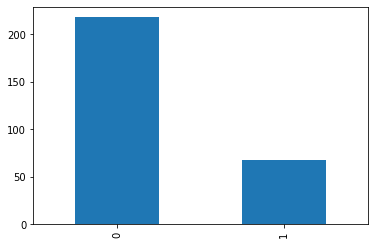

In [245]:
df['irradient'].value_counts().plot.bar()

이 피쳐 역시 개인적으로 유의미할 것이라고 생각하고 있다. 확인해보자

metadata의 경우에는 shape은 bin, type은 input, dtype은 int로 추가하겠다.

In [246]:
metadata = metadata.append({'feature':'irradient','shape':'bin','type':'input','dtype':'int'},ignore_index = True)

metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int
2,menopause,nomi,input,int
3,tumor-size,ordi,input,int
4,inv-nodes,ordi,input,int
5,node-caps,bin,input,int
6,deg-malig,ordi,input,int
7,breast,bin,input,int
8,breast-quad,nomi,input,int
9,irradient,bin,input,int


### 결측치 채우기

In [247]:
import missingno as msno

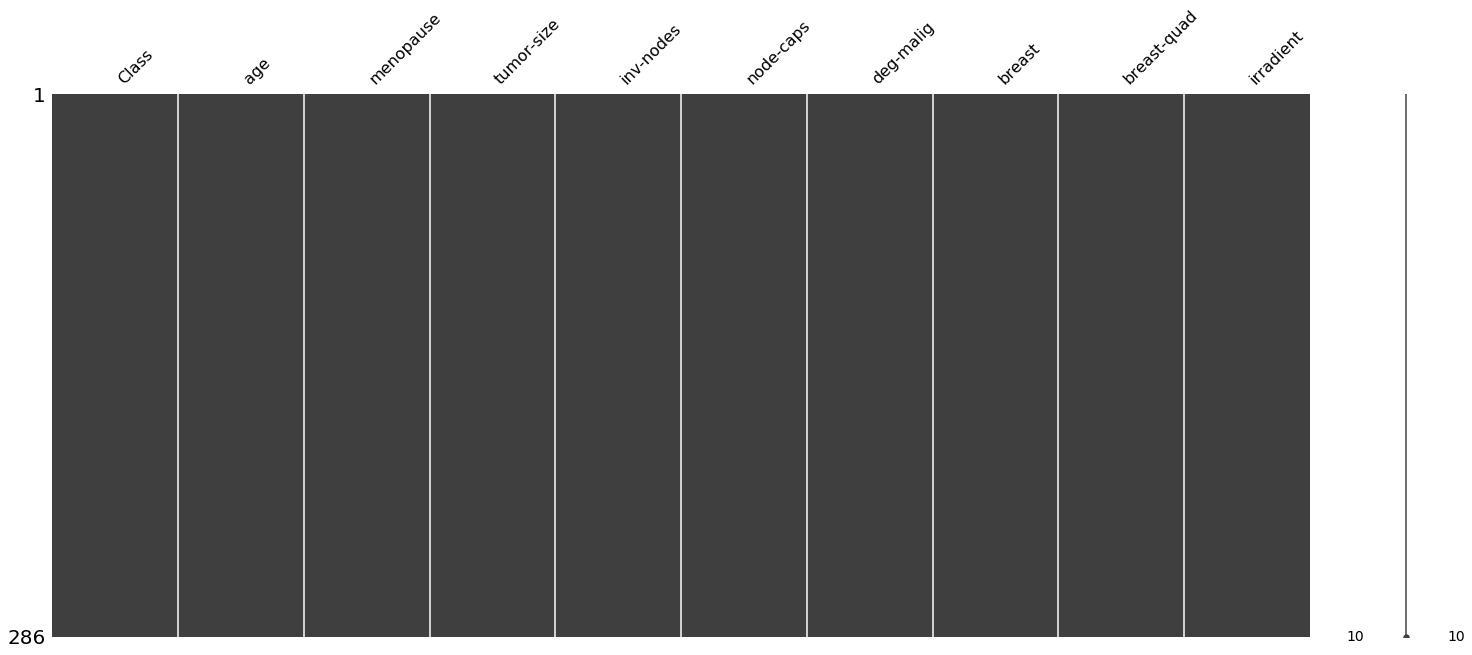

In [248]:
msno.matrix(df)

In [249]:
for i in df.columns:
    print(i,df[i].isnull().sum()/len(df[i]))

Class 0.0
age 0.0
menopause 0.0
tumor-size 0.0
inv-nodes 0.0
node-caps 0.0
deg-malig 0.0
breast 0.0
breast-quad 0.0
irradient 0.0


In [250]:
for i in df.columns:
    print(i, df[i].unique())

Class [0 1]
age [3 4 6 5 7 2]
menopause [2 1 0]
tumor-size [ 7  5  4  1  6 11  3  9  8  2 10]
inv-nodes [1 3 4 2 6 5 9]
node-caps [0 1 '?']
deg-malig [3 2 1]
breast [0 1]
breast-quad [0 3 1 2 4 '?']
irradient [0 1]


missingno 라이브러리와 결측치 계산 코드에서도 알 수 있듯이 ?값 이외의 null값은 존재하지 않는다.

위에서 찾은 결측값들을 정리해보자면 

림프절에 전이성 암이 포함되어있는지에 대한 피쳐인 node-caps에서 결측치 '?'가 존재했고

유두를 기준으로 암이 어느부분에 분포되어있는지를 나타내주는 breast-quad 피쳐에 결측치 '?'가 존재했다.

In [251]:
for i in ['node-caps','breast-quad']:
    print(i, len(df[df[i] == '?']) / len(df[i]) * 100, '%')

node-caps 2.797202797202797 %
breast-quad 0.34965034965034963 %


node-caps 같은 경우는 2.79%, breast-quad는 0.34%의 결측값을 갖고 있다.

In [252]:
df.replace('?',np.nan, inplace = True)  # '?'값을 null 값으로 변경해 isnull로 searching 가능하게 만들자

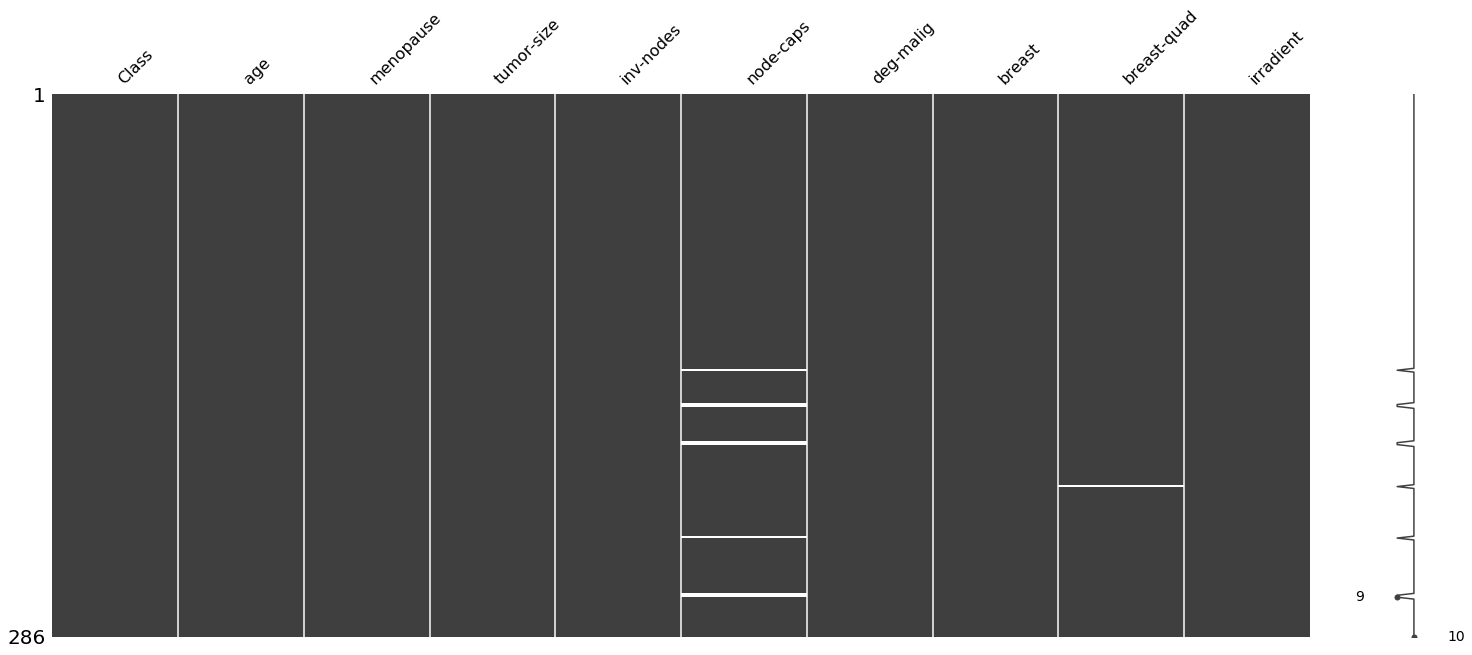

In [253]:
msno.matrix(df)

#### breast-quad 결측값 채우기

유두를 기준으로 어떤 부분에 유방암이 존재하는가에 대한 피쳐이다.

left_low : 0, left_up : 1, right_low : 2, right_up : 3, central : 4로 표현되었다.

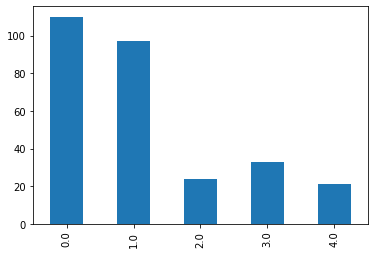

In [254]:
df['breast-quad'].value_counts().sort_index().plot.bar()

left_low, left_up이 가장 많지만 이게 어떤 것을 의미하는지는 정확히 확인되지 않는다. 

결측값이 0.34%로 매우 작다는 것을 감안했을 때, 최빈값으로 결측치를 대체해주겠다.

In [255]:
df['breast-quad'] = df['breast-quad'].fillna(0)

#### node-caps 결측값 채우기

림프절에 전이성 암이 존재하는가에 대해서 yes, no로 표현한 피쳐이다.

yes : 1, no : 0으로 대체해주었다는 것을 바탕으로 결측값을 채우자.

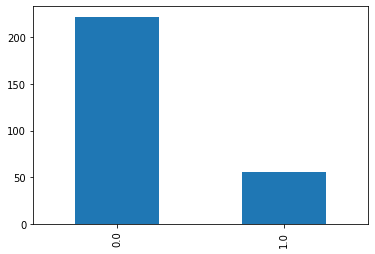

In [256]:
df['node-caps'].value_counts().plot.bar()

전이성 암이 존재하지 않는 사람이 존재하는 사람에 비해 많지만 그렇다고 최빈값으로 결측값을 채우기에는 무리가 있어 보인다. 

binary 데이터이기 때문에 평균값으로도 채울수없다고 판단된다.

데이터 셋의 크기가 작다는 점, 그리고 binary여서 계산량이 크지 않다는 점을 고려했을 때, KNN을 통해서 결측치를 채우겠다

In [257]:
train_x = df[df['node-caps'].notnull()].drop(['node-caps'],axis = 1)
train_y = df[df['node-caps'].notnull()]['node-caps']

test_x = df[df['node-caps'].isnull()].drop(['node-caps'],axis = 1)
test_y = df[df['node-caps'].isnull()]['node-caps']

In [258]:
# 주의해야할 점 : fit, transform 메서드를 정확히 이해해야한다. 
# 내가 이해한 바로는 fit은 데이터에 맞게 변환 함수를 생성, transform은 실제 변환하는 과정이다. 
# 그렇기 떄문에 train 데이터를 바탕으로 fit시키고, 이후 transform을 시키는 fit_transform 메서드를 사용할 수 있는 것이고, test 데이터는 train에서 fit된 scaler를 통해 transform만 시켜야하는 것이다.
# 그리고 cv_fold에서는 전체를 먼저 scaling 시키고 모델링을 평가하는 것이 어불성실이기 때문에 pipeline을 이용하는 것이다.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(train_x)

knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(X_std,train_y)

In [259]:
test_X_std = scaler.transform(test_x)

knn.predict(test_X_std)

array([0., 0., 0., 1., 1., 0., 0., 0.])

In [260]:
test_y = knn.predict(test_X_std)

In [261]:
test_y

array([0., 0., 0., 1., 1., 0., 0., 0.])

In [262]:
df[df['node-caps'].isnull()]['node-caps']

145   NaN
163   NaN
164   NaN
183   NaN
184   NaN
233   NaN
263   NaN
264   NaN
Name: node-caps, dtype: float64

In [263]:
k = 0
for i in df[df['node-caps'].isnull()]['node-caps'].index:
    df.loc[i,'node-caps'] = test_y[k]
    k = k + 1

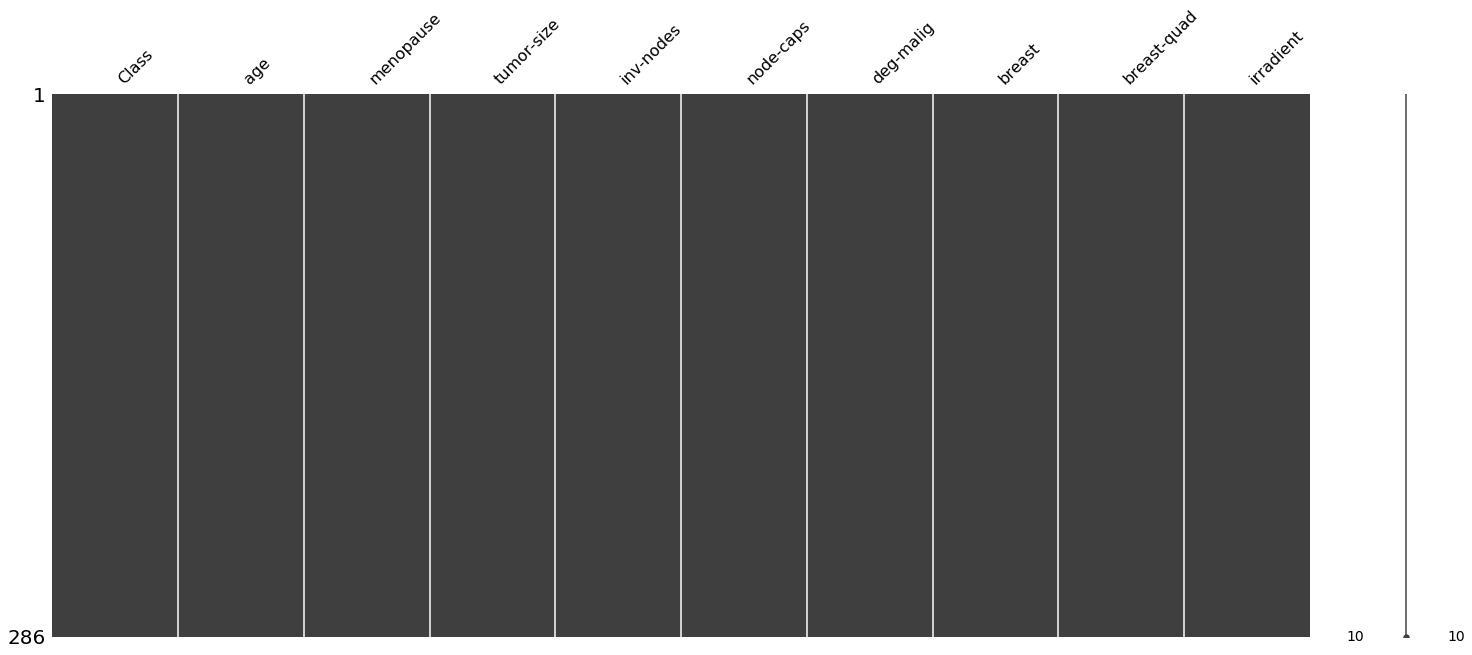

In [264]:
msno.matrix(df)

이로서 결측값이 모두 채워졌다!

#### nominal data를 bin으로 바꾸기

nominal data는 순서가 없지만 1,2,3이라는 숫자로 표현되어있기 때문에 상관계수를 확인할 때나 여러 분포 및 모델링을 할 때 오류를 불러 일으킬 수 있다.

nominal data를 dummy를 활용하여 bin data로 변경하자

In [265]:
metadata

,feature,shape,type,dtype
0,Class,bin,target,int
1,age,ordi,input,int
2,menopause,nomi,input,int
3,tumor-size,ordi,input,int
4,inv-nodes,ordi,input,int
5,node-caps,bin,input,int
6,deg-malig,ordi,input,int
7,breast,bin,input,int
8,breast-quad,nomi,input,int
9,irradient,bin,input,int


In [266]:
metadata[metadata['shape'] == 'nomi']

,feature,shape,type,dtype
2,menopause,nomi,input,int
8,breast-quad,nomi,input,int


In [267]:
df = pd.concat([df,pd.get_dummies(df['menopause'],prefix = 'meno_')], axis = 1)

In [268]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient,meno__0,meno__1,meno__2
0,0,3,2,7,1,0.0,3,0,0.0,0,0,0,1
1,0,4,2,5,1,0.0,2,1,3.0,0,0,0,1
2,0,4,2,5,1,0.0,2,0,0.0,0,0,0,1
3,0,6,1,4,1,0.0,2,1,1.0,0,0,1,0
4,0,4,2,1,1,0.0,2,1,2.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,3,2,7,1,0.0,2,0,1.0,0,0,0,1
282,1,3,2,5,1,0.0,3,0,1.0,1,0,0,1
283,1,6,1,5,1,0.0,1,1,1.0,0,0,1,0
284,1,4,1,7,2,0.0,3,0,0.0,0,0,1,0


In [269]:
df = pd.concat([df,pd.get_dummies(df['breast-quad'],prefix = 'bq')], axis = 1)

In [270]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradient,meno__0,meno__1,meno__2,bq_0.0,bq_1.0,bq_2.0,bq_3.0,bq_4.0
0,0,3,2,7,1,0.0,3,0,0.0,0,0,0,1,1,0,0,0,0
1,0,4,2,5,1,0.0,2,1,3.0,0,0,0,1,0,0,0,1,0
2,0,4,2,5,1,0.0,2,0,0.0,0,0,0,1,1,0,0,0,0
3,0,6,1,4,1,0.0,2,1,1.0,0,0,1,0,0,1,0,0,0
4,0,4,2,1,1,0.0,2,1,2.0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,3,2,7,1,0.0,2,0,1.0,0,0,0,1,0,1,0,0,0
282,1,3,2,5,1,0.0,3,0,1.0,1,0,0,1,0,1,0,0,0
283,1,6,1,5,1,0.0,1,1,1.0,0,0,1,0,0,1,0,0,0
284,1,4,1,7,2,0.0,3,0,0.0,0,0,1,0,1,0,0,0,0


In [272]:
df = df.drop(['breast-quad','menopause'],axis = 1)

In [273]:
df

,Class,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradient,meno__0,meno__1,meno__2,bq_0.0,bq_1.0,bq_2.0,bq_3.0,bq_4.0
0,0,3,7,1,0.0,3,0,0,0,0,1,1,0,0,0,0
1,0,4,5,1,0.0,2,1,0,0,0,1,0,0,0,1,0
2,0,4,5,1,0.0,2,0,0,0,0,1,1,0,0,0,0
3,0,6,4,1,0.0,2,1,0,0,1,0,0,1,0,0,0
4,0,4,1,1,0.0,2,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,3,7,1,0.0,2,0,0,0,0,1,0,1,0,0,0
282,1,3,5,1,0.0,3,0,1,0,0,1,0,1,0,0,0
283,1,6,5,1,0.0,1,1,0,0,1,0,0,1,0,0,0
284,1,4,7,2,0.0,3,0,0,0,1,0,1,0,0,0,0


### Feature Selection 

피쳐들간의 상관계수 값들 그리고 target 값과 각 피쳐간의 관계를 나타내겠다.

먼저 ordi data들의 상관계수를 확인하겠다.

In [280]:
for i in metadata[metadata['shape'] == 'ordi'].feature:
    print(i)

age
tumor-size
inv-nodes
deg-malig


In [296]:
corr = df[metadata[metadata['shape'] == 'ordi'].feature].corr(method = 'pearson')

print(corr)

                 age  tumor-size  inv-nodes  deg-malig
age         1.000000   -0.010559  -0.035112  -0.085968
tumor-size -0.010559    1.000000   0.160487   0.218169
inv-nodes  -0.035112    0.160487   1.000000   0.329048
deg-malig  -0.085968    0.218169   0.329048   1.000000


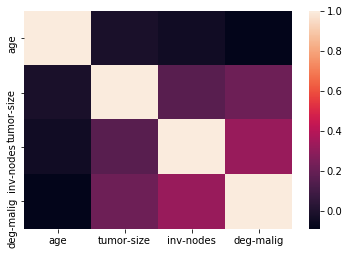

In [291]:
sns.heatmap(corr, cmap='viridis')
plt.show()

In [293]:
corr_sp = df[metadata[metadata['shape'] == 'ordi'].feature].corr(method = 'spearman')

print(corr_sp)

                 age  tumor-size  inv-nodes  deg-malig
age         1.000000   -0.028765  -0.052185  -0.074762
tumor-size -0.028765    1.000000   0.208945   0.236712
inv-nodes  -0.052185    0.208945   1.000000   0.336448
deg-malig  -0.074762    0.236712   0.336448   1.000000


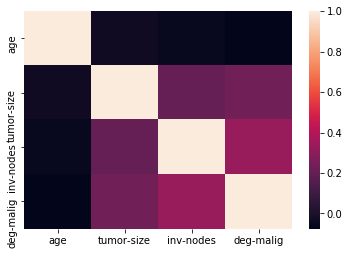

In [294]:
sns.heatmap(corr_sp)
plt.show()

피어슨 상관관계와 스피어만 상관관계가 일치하는 것을 알 수 있다.

모든 피쳐가 높은 상관관계를 띄고 있지는 않는다는 것을 확인할 수 있다.

--> 삭제할 피쳐는 없다.

In [298]:
corr = df[['Class','age','tumor-size','inv-nodes','deg-malig']].corr(method = 'pearson')

print(corr)

               Class       age  tumor-size  inv-nodes  deg-malig
Class       1.000000 -0.071719    0.175065   0.275881   0.299400
age        -0.071719  1.000000   -0.010559  -0.035112  -0.085968
tumor-size  0.175065 -0.010559    1.000000   0.160487   0.218169
inv-nodes   0.275881 -0.035112    0.160487   1.000000   0.329048
deg-malig   0.299400 -0.085968    0.218169   0.329048   1.000000


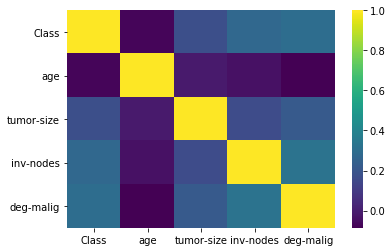

In [299]:
sns.heatmap(corr, cmap='viridis')
plt.show()

In [300]:
corr_sp = df[['Class','age','tumor-size','inv-nodes','deg-malig']].corr(method = 'spearman')

print(corr_sp)

               Class       age  tumor-size  inv-nodes  deg-malig
Class       1.000000 -0.069759    0.181704   0.310065   0.302621
age        -0.069759  1.000000   -0.028765  -0.052185  -0.074762
tumor-size  0.181704 -0.028765    1.000000   0.208945   0.236712
inv-nodes   0.310065 -0.052185    0.208945   1.000000   0.336448
deg-malig   0.302621 -0.074762    0.236712   0.336448   1.000000


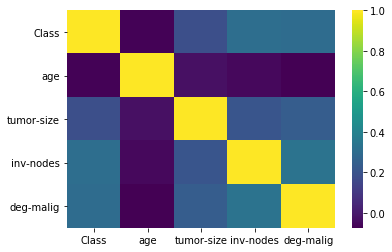

In [301]:
sns.heatmap(corr_sp, cmap='viridis')
plt.show()

               Class       age  tumor-size  inv-nodes  deg-malig
Class       1.000000 -0.069759    0.181704   0.310065   0.302621
age        -0.069759  1.000000   -0.028765  -0.052185  -0.074762
tumor-size  0.181704 -0.028765    1.000000   0.208945   0.236712
inv-nodes   0.310065 -0.052185    0.208945   1.000000   0.336448
deg-malig   0.302621 -0.074762    0.236712   0.336448   1.000000


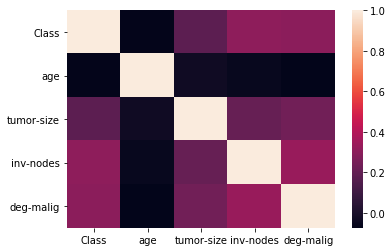

In [309]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_ordi = pd.DataFrame(scaler.fit_transform(df[['Class','age','tumor-size','inv-nodes','deg-malig']]), columns = ['Class','age','tumor-size','inv-nodes','deg-malig'])

corr_sp = scaled_ordi.corr(method = 'spearman')

print(corr_sp)

sns.heatmap(corr_sp)
plt.show();

상관계수는 